In [1]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# .....................Importing Important libraries for Classification Models................
# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Ensemble Techniques.
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc

# Importing Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv('HR_Employee_Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Understanding Data:                 
                           
1) Features/Attributes: There are 35 Features present in the dataset.                                     
   >> Age, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber,
      EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MonthlyIncome,
      MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction,             StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance,
      YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, MaritalStatus.            
                                                     
2) Target/Label:
   >> Attrition                        
                                             
3) So there are different attributes given based on that we have to predict the Attrition in the company. The Data is              categorical thus i will use Classification models and Logistic Regression for evaluation.       

In [3]:
# Checking the Features....
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
 # Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 1470 rows and 35 columns.
df.shape

(1470, 35)

In [5]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [6]:
# Printing the last 10 columns of the dataset.... 
df.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1460,29,No,Travel_Rarely,468,Research & Development,28,4,Medical,1,2054,...,2,80,0,5,3,1,5,4,0,4
1461,50,Yes,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,...,2,80,1,20,3,3,3,2,2,0
1462,39,No,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,...,1,80,1,21,2,2,20,9,9,6
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
# Checking the no. of different unique values present in the each Feature of the Dataset......
for i in df.columns.values:
    print('Number of unique values of {} : {}'.format(i,df[i].nunique()))

Number of unique values of Age : 43
Number of unique values of Attrition : 2
Number of unique values of BusinessTravel : 3
Number of unique values of DailyRate : 886
Number of unique values of Department : 3
Number of unique values of DistanceFromHome : 29
Number of unique values of Education : 5
Number of unique values of EducationField : 6
Number of unique values of EmployeeCount : 1
Number of unique values of EmployeeNumber : 1470
Number of unique values of EnvironmentSatisfaction : 4
Number of unique values of Gender : 2
Number of unique values of HourlyRate : 71
Number of unique values of JobInvolvement : 4
Number of unique values of JobLevel : 5
Number of unique values of JobRole : 9
Number of unique values of JobSatisfaction : 4
Number of unique values of MaritalStatus : 3
Number of unique values of MonthlyIncome : 1349
Number of unique values of MonthlyRate : 1427
Number of unique values of NumCompaniesWorked : 10
Number of unique values of Over18 : 1
Number of unique values of

In [8]:
# Counting Number of Leavers present.......
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
# Statistical Features Information......
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
# checking the Features information regarding the dataset....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [11]:
# These Feature('StandardHours','Over18','EmployeeCount) has only one value throughout the dataset 
# so it will not help us in anywhere in data predicting  so we can drop these columns......
df.drop(['StandardHours','Over18','EmployeeCount'],axis=1,inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [12]:
# Now checking that whether these Features dropped succesfully or not....
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2


## Univarient Graph Analysis:

Age                            AxesSubplot(0.125,0.787927;0.168478x0.0920732)
DailyRate                   AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
DistanceFromHome            AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
Education                   AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
EmployeeNumber                 AxesSubplot(0.125,0.677439;0.168478x0.0920732)
EnvironmentSatisfaction     AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
HourlyRate                  AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
JobInvolvement              AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
JobLevel                       AxesSubplot(0.125,0.566951;0.168478x0.0920732)
JobSatisfaction             AxesSubplot(0.327174,0.566951;0.168478x0.0920732)
MonthlyIncome               AxesSubplot(0.529348,0.566951;0.168478x0.0920732)
MonthlyRate                 AxesSubplot(0.731522,0.566951;0.168478x0.0920732)
NumCompaniesWorked             AxesSubplot(0.125,0.456463;0.1684

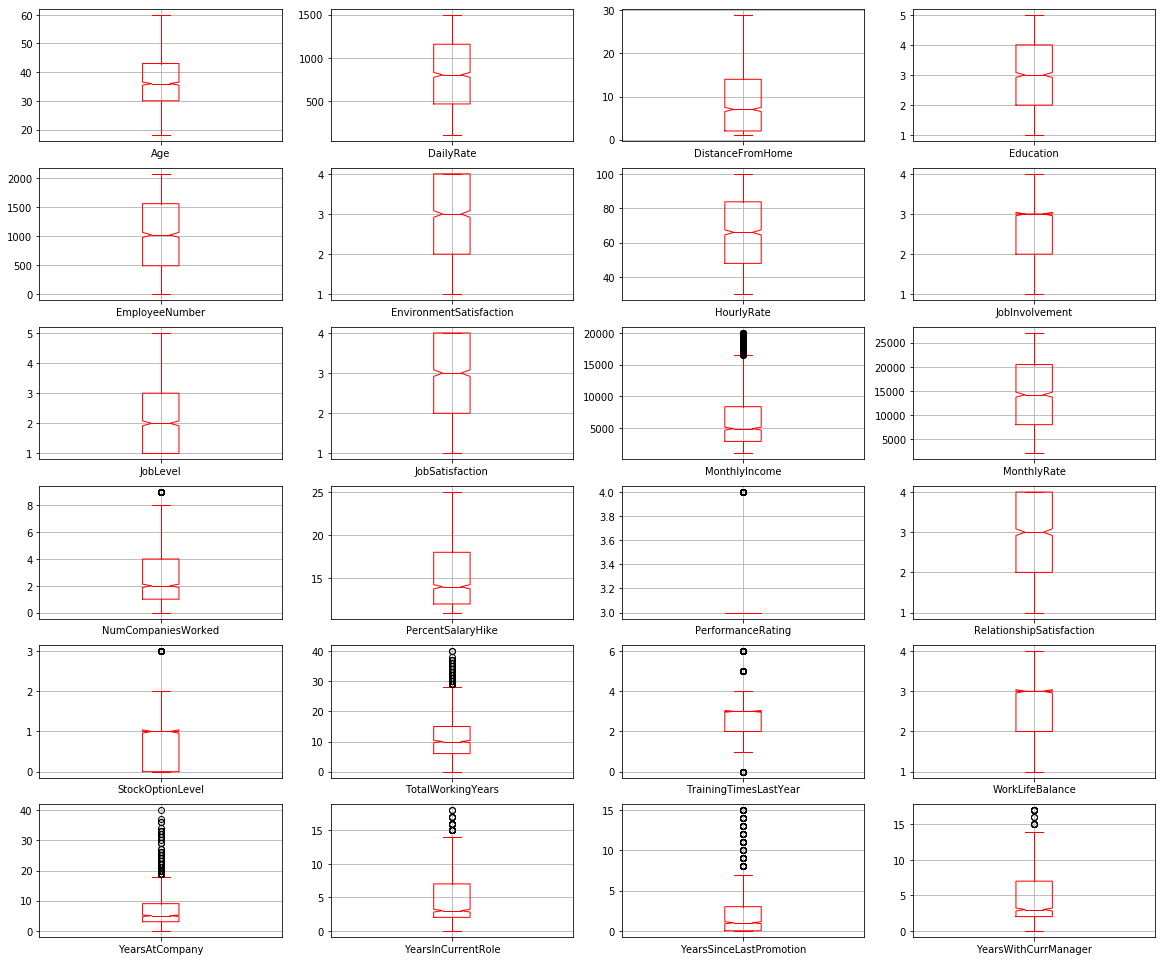

In [13]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(7,4),figsize=(20,20),grid=True,notch=True,color='red' ,legend=True)

##### 6 Features have outliers i will remove them after bivariate analysis....

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002418BE41388>,
      dtype=object)

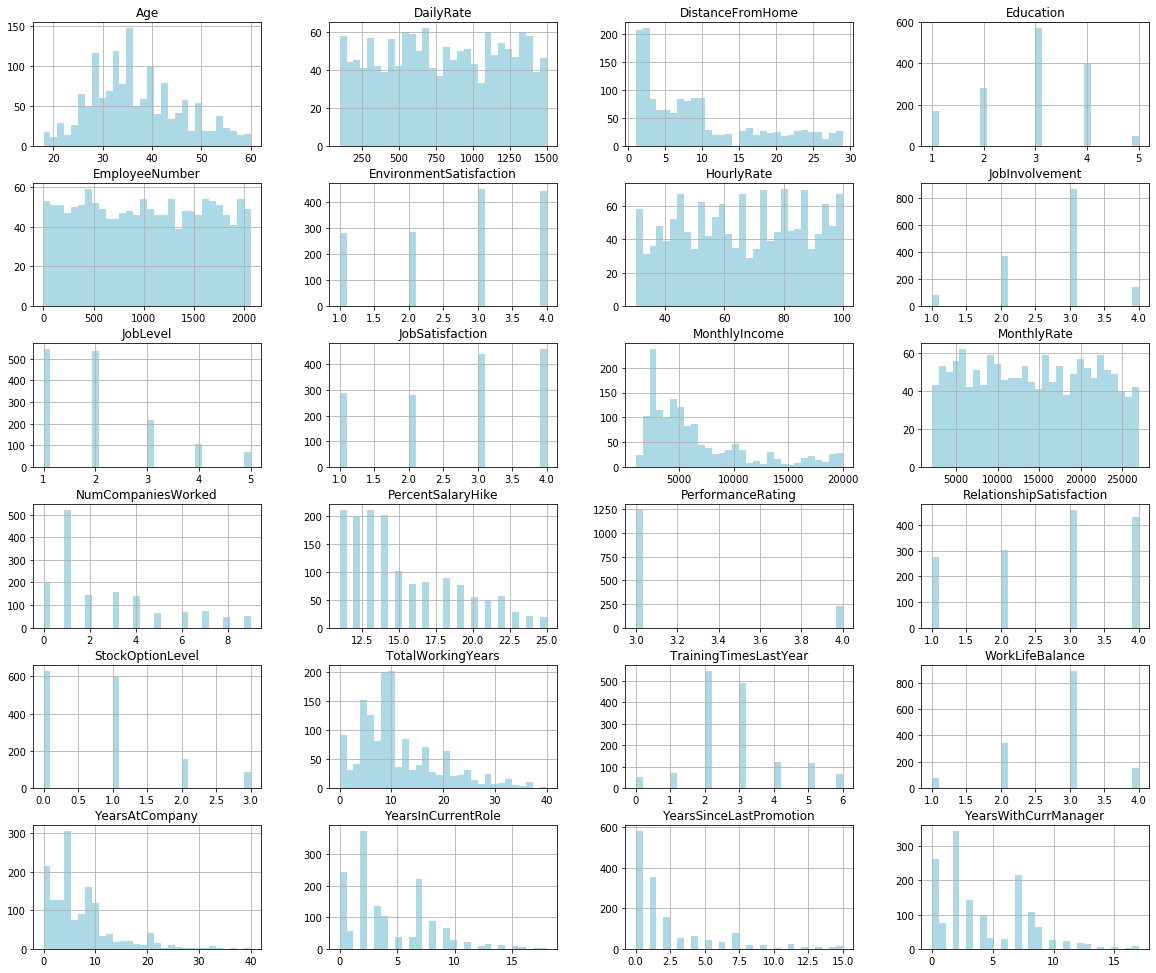

In [14]:
 #Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(7,4),bins=30,color='lightblue') 

In [15]:
# Counting Number of employees who left and who are loyal....
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

## Bivariate Analysis

<Figure size 720x720 with 0 Axes>

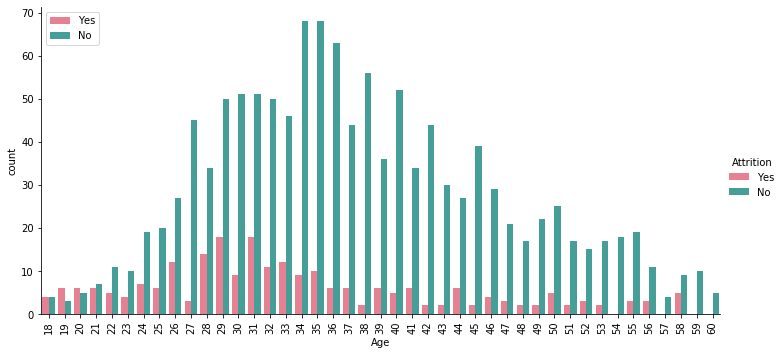

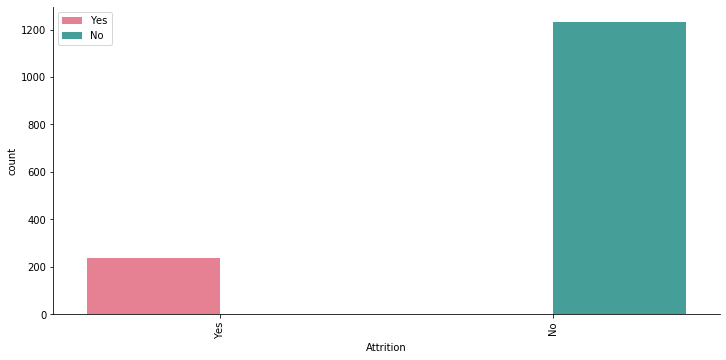

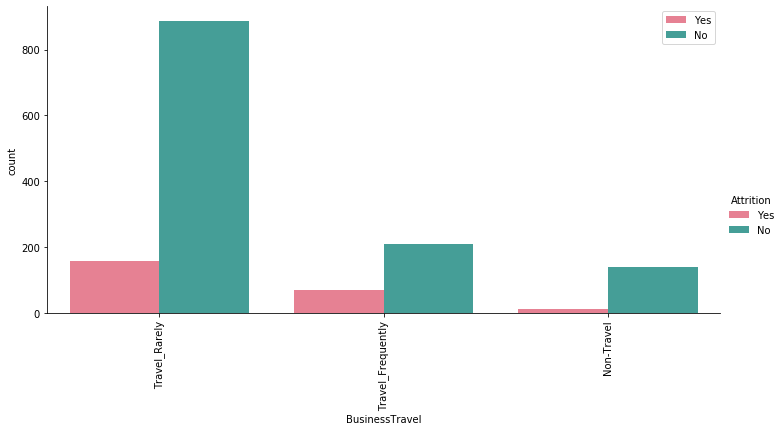

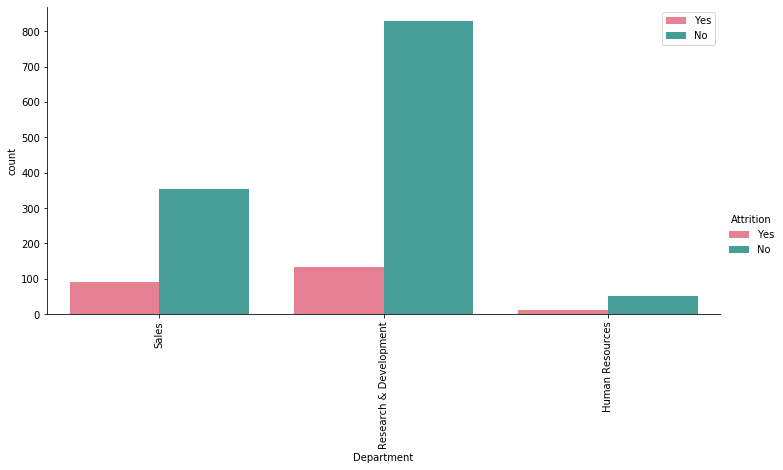

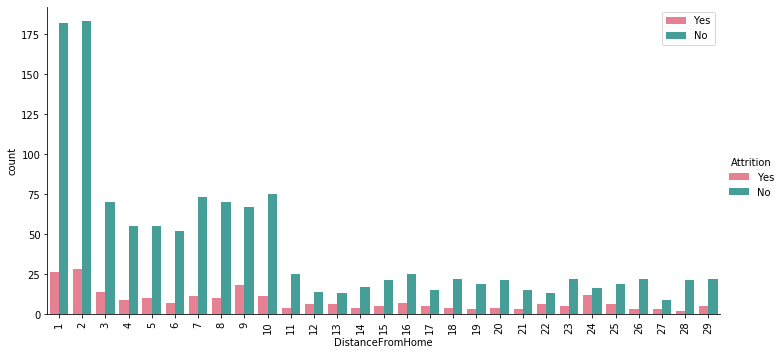

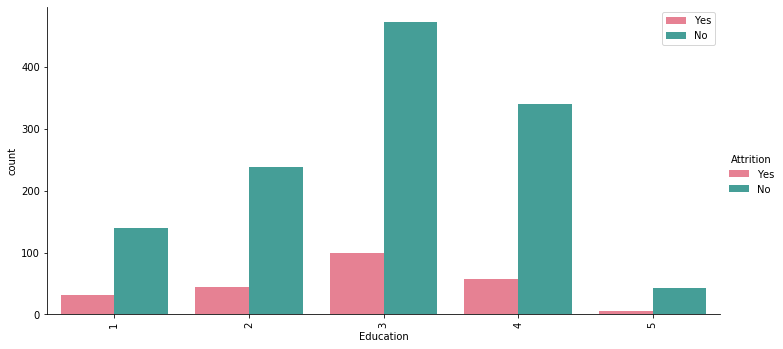

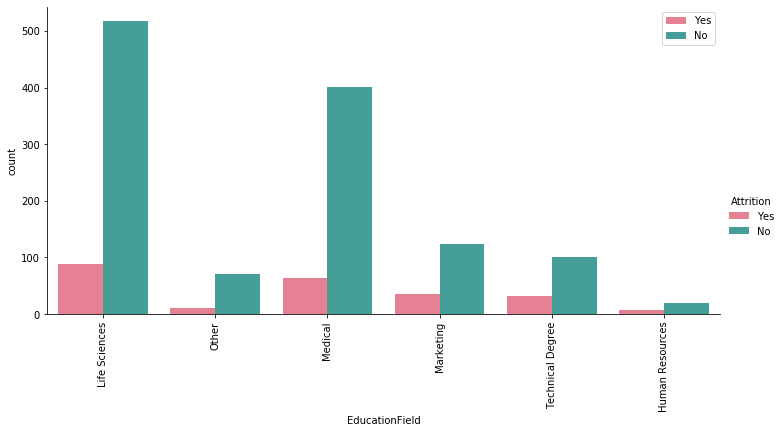

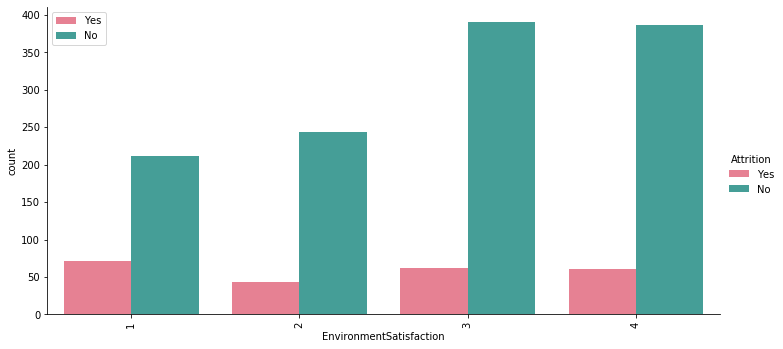

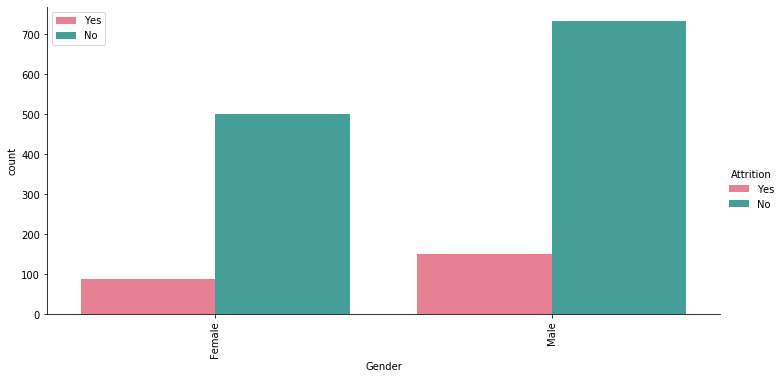

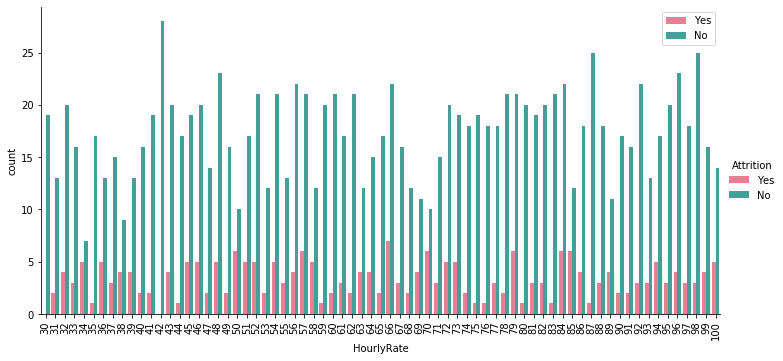

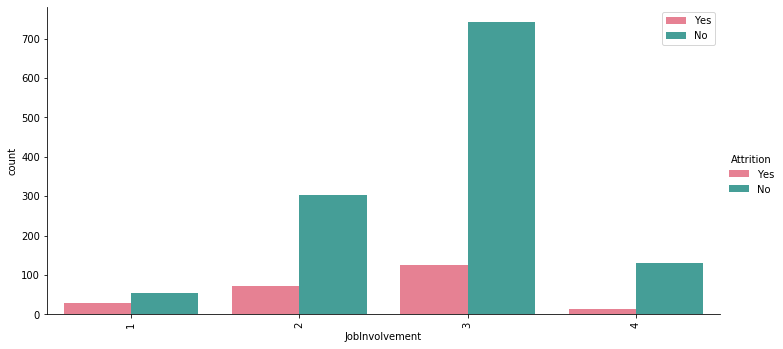

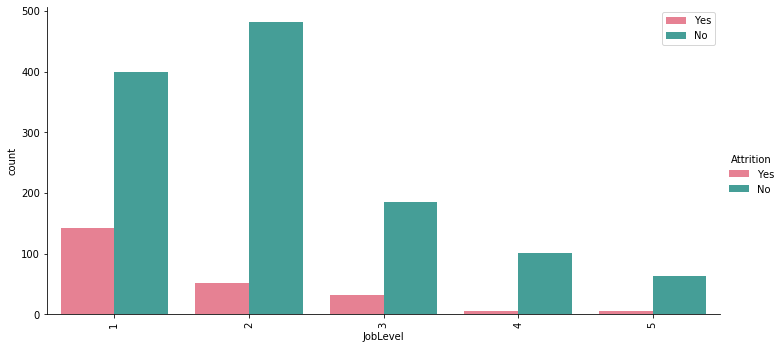

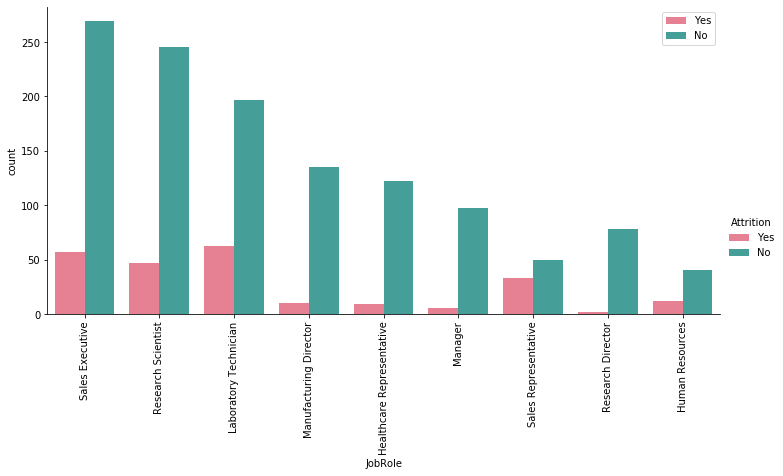

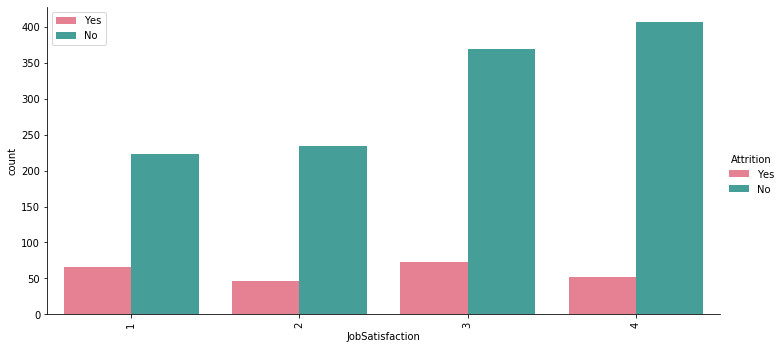

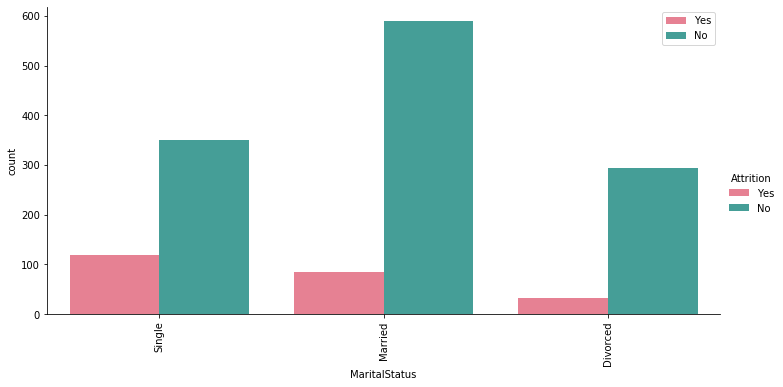

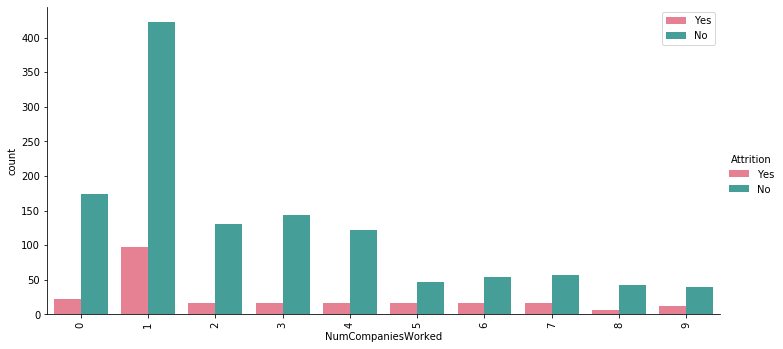

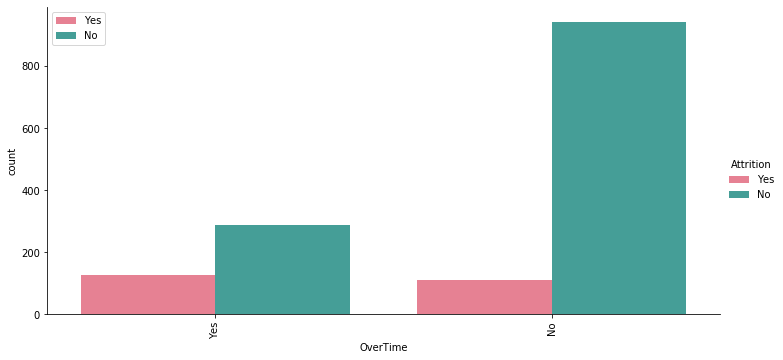

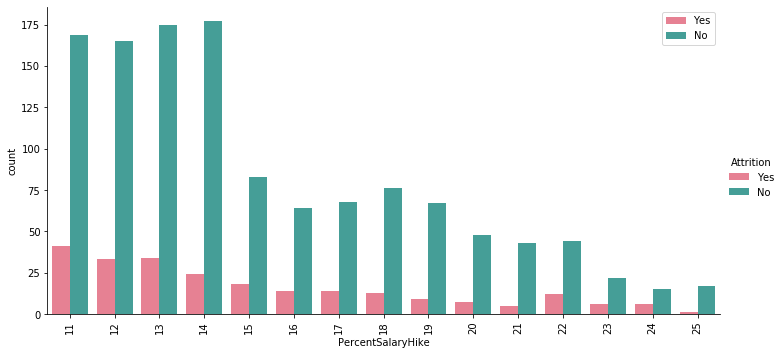

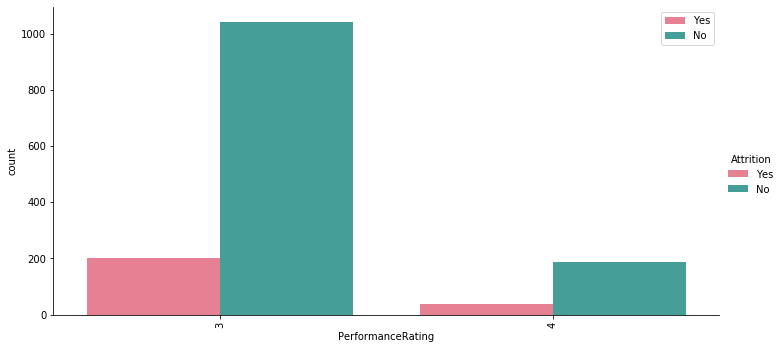

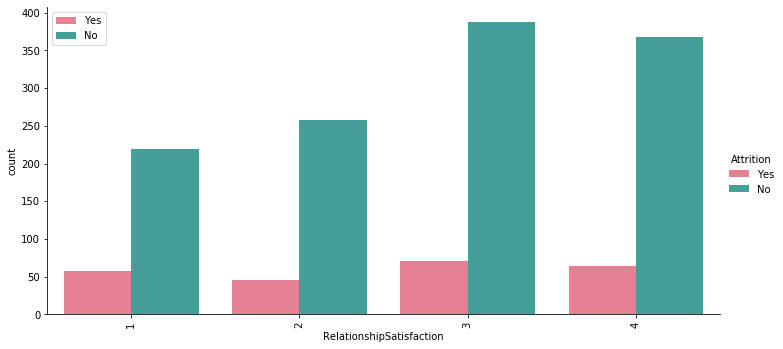

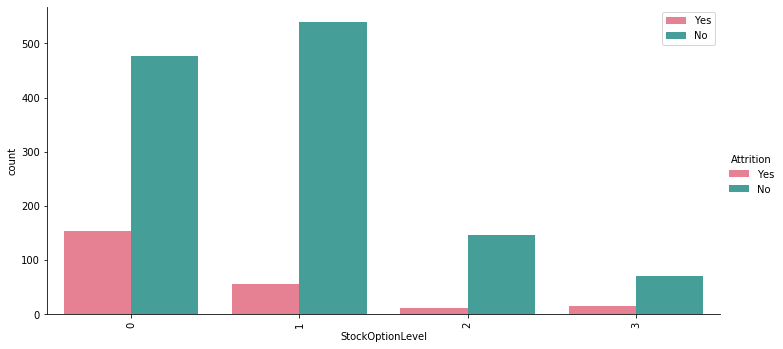

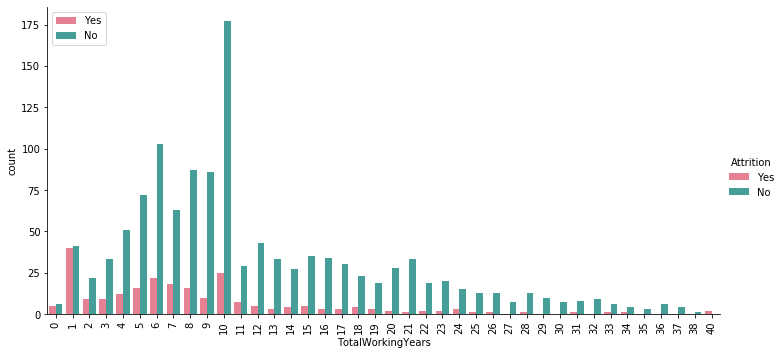

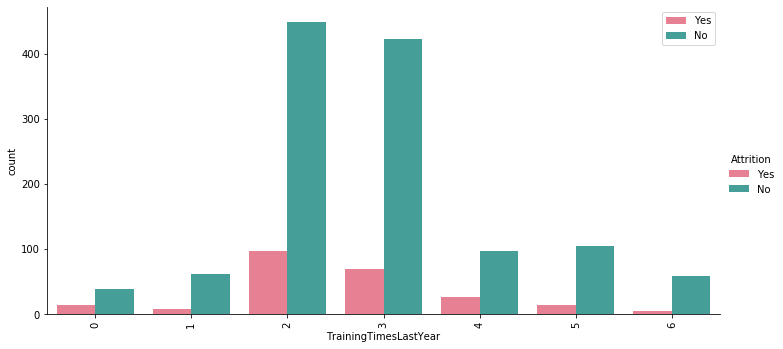

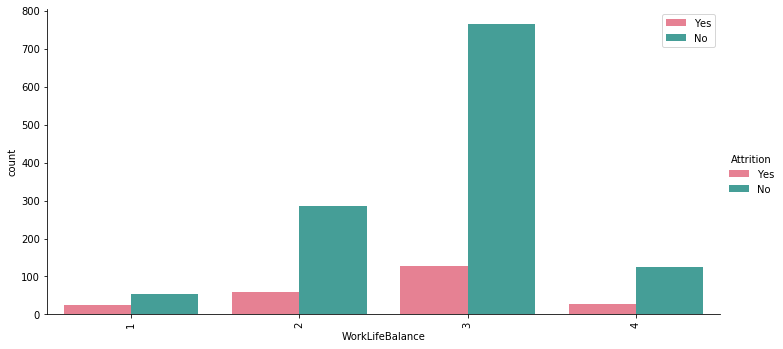

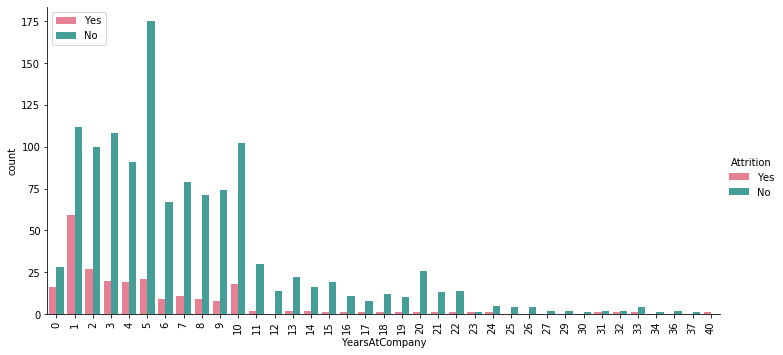

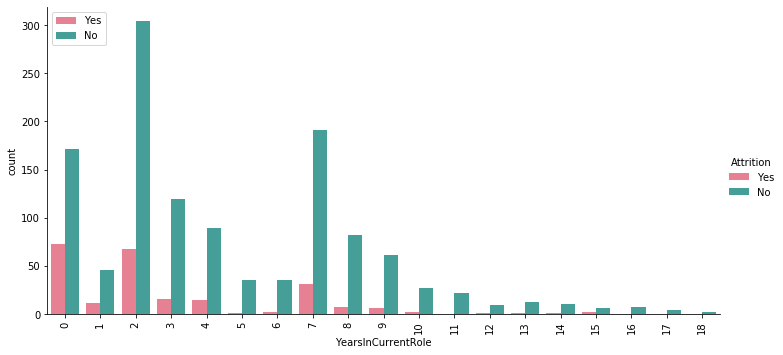

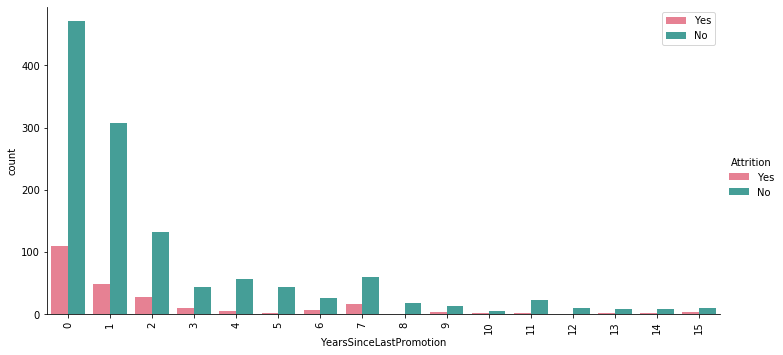

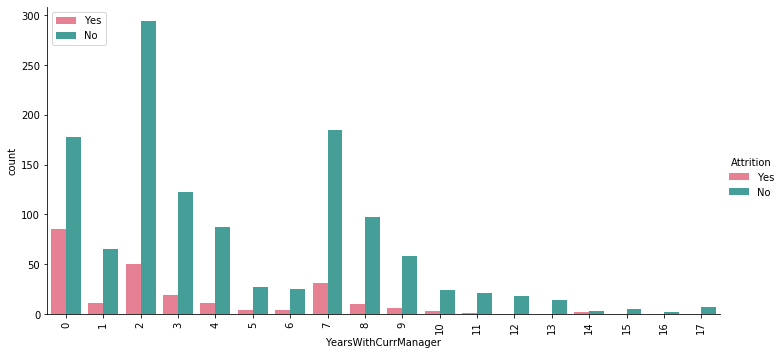

In [16]:
# Okay so this is an important function in this i am counting Values for each Features present in the dataset filtered by 
#  Attrition and many conclusion are made using these graphs.....
m=df.drop(['MonthlyRate','EmployeeNumber','MonthlyIncome','DailyRate'],axis=1).columns.values
plt.figure(figsize=(10,10))
for i in m:
    sns.catplot(x=i,data=df,kind='count',hue='Attrition',height=5, aspect=2,palette='husl')
    plt.xticks(rotation=90)
    plt.legend()

#### Conclusions from the above Graphs....     

1) So the Employees whose ages are between 26 and 33 are more keen to left the company, looks like persons with less               experience switches jobs more frequently.                        
2) Company have more employees whose age lie between 34 and 36.                  
3) Number of leavers are less as compared to loyal employees.                               
4) Number of Persons who left falls in the Travel_Rarely Category but, Proportion of attrition is higher where travel is           frequently.                                                    
5) Number of persons who left are from R&D department but the proportion is high in Sales Department.                
6) Number of Persons who left lives in the (0-10) km range are more.                            
7) Number of Persons who left are from Life Sciences EducationField.                                    
8) People who likes the enviroment very much and who don't like the environment are almost equal.                      
9) Ex Employees are more who are male than Females.                             
10) Hourly Rate of Ex-Employees are less, This shows their inefficiency.                              
11) Number of Laboratory Technicians and also their proportion of Attrition is more than the rest.            
12) so we can analyse  the attrition ratio in each category of Job Satisfaction and take corrective actions by understanding       the reason behind the attrition.                 
13) Here we are able  to see that as job satisfaction increases proportion of leavers decreases.                       
14) Persons who are single are more eager to switch jobs, Married persons take the risk of Leaving less.          
15) Persons who works in less companies( preferably 1) are more. Looks like they think that switching jobs increase their           salary.                                
16) Proportion of Attrition is more in the group who does more overtime.                               
17) As Proportion of Salaryhike increases Proportion of Attrition also increases, looks like Switching is due to less salary       increment.                                     
18) May be since Ex's expect that their work deserves more rating and is undervalued, almost all the people who left were who       got rating 3.                                       
19) Employees who do have 0 stockoption level have more Attrition rate.                       
20) Employees who do have less Total working years have high Attrition rate.                      
21) Employees who spent less time in the company have high Attrition rate.                          
22) Employees who have less Professional experience in their respective field has high Attrition rate.                          

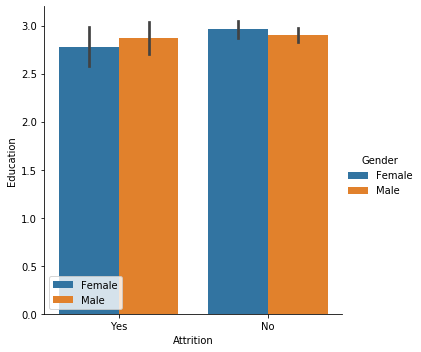

In [17]:
# Graph between Education and Attrition filtered by Gender....
sns.catplot(y='Education',x='Attrition',data=df,kind='bar',hue='Gender')
plt.legend()

##### conclusion from graph:      
1) Out of the persons the persons who quit, Males were more educated than females according to the past data....      
2) Out of the persons the persons who don't left, Females were more educated than males according to the past data....

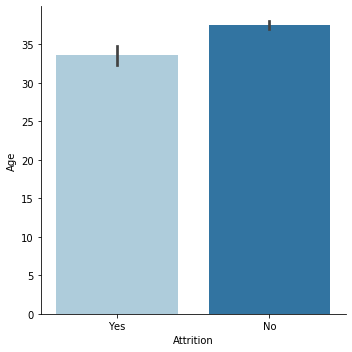

In [18]:
# Graph between Age and Attrition....
sns.catplot(x='Attrition',y='Age',data=df,kind='bar',palette='Paired')

##### Persons who left the job are mostly younger in age with respect to those who are loyal....

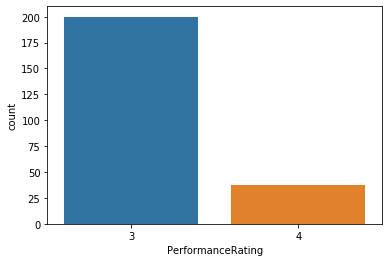

In [19]:
#Now lets check how performnce rating is afecting attrition level
sns.countplot(x="PerformanceRating",data=df.loc[df["Attrition"]=="Yes"])
plt.show()
# May be since they expect that their work deserves more rating and is undervalued, 
#  almost all the people who left were who got rating....

In [20]:
# Using Label Encoder so that object data can be convert to binary data so that data can be evaluated
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['Attrition','BusinessTravel','Department','EducationField','Gender','OverTime','MaritalStatus','JobRole']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))
df

# Attrition: Yes=1, No=0
# Buisness Travel: 1= Travel Frequently ,2= Travel Rarely ,3=

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [21]:
# Checking Skewness....
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

In [22]:
# Removing Skewness
for i in df.drop(['Attrition'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [23]:
# checking the skewness again after removing skewness....
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.029121
Education                  -0.289681
EducationField             -0.054786
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
OverTime                    0.964489
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears          -0.622175
TrainingTimesLastYear      -1.075852
W

In [24]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(1470, 32)
(1406, 32)


Age                            AxesSubplot(0.125,0.799681;0.168478x0.0803191)
Attrition                   AxesSubplot(0.327174,0.799681;0.168478x0.0803191)
BusinessTravel              AxesSubplot(0.529348,0.799681;0.168478x0.0803191)
DailyRate                   AxesSubplot(0.731522,0.799681;0.168478x0.0803191)
Department                     AxesSubplot(0.125,0.703298;0.168478x0.0803191)
DistanceFromHome            AxesSubplot(0.327174,0.703298;0.168478x0.0803191)
Education                   AxesSubplot(0.529348,0.703298;0.168478x0.0803191)
EducationField              AxesSubplot(0.731522,0.703298;0.168478x0.0803191)
EmployeeNumber                 AxesSubplot(0.125,0.606915;0.168478x0.0803191)
EnvironmentSatisfaction     AxesSubplot(0.327174,0.606915;0.168478x0.0803191)
Gender                      AxesSubplot(0.529348,0.606915;0.168478x0.0803191)
HourlyRate                  AxesSubplot(0.731522,0.606915;0.168478x0.0803191)
JobInvolvement                 AxesSubplot(0.125,0.510532;0.1684

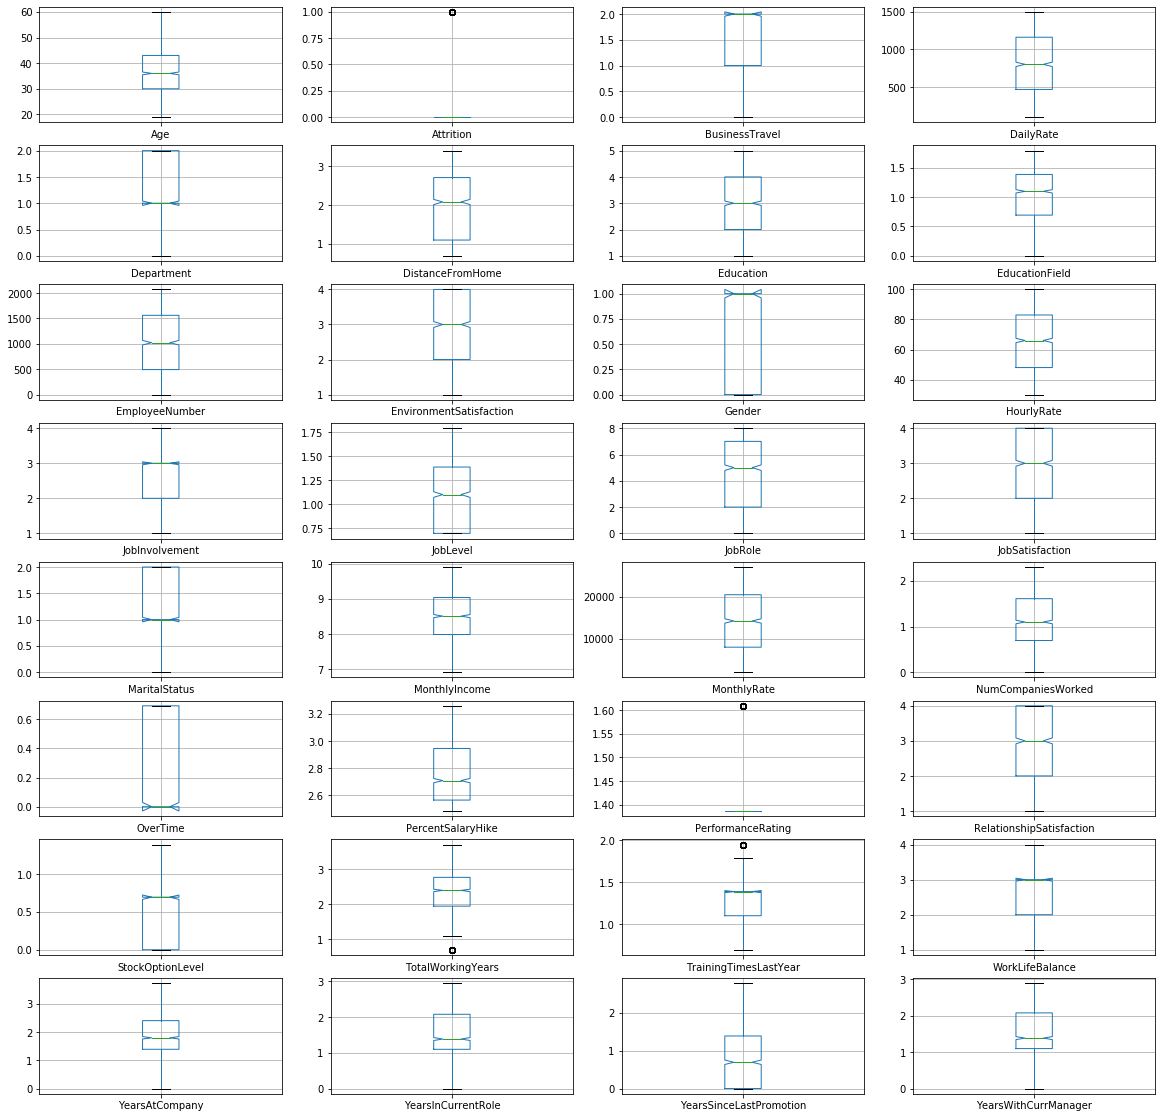

In [25]:
# Plotting the boxplot in order to check few statistical values and outliers
df_new.plot(kind='box', subplots=True, layout=(8,4),figsize=(20,20),grid=True,notch=True)

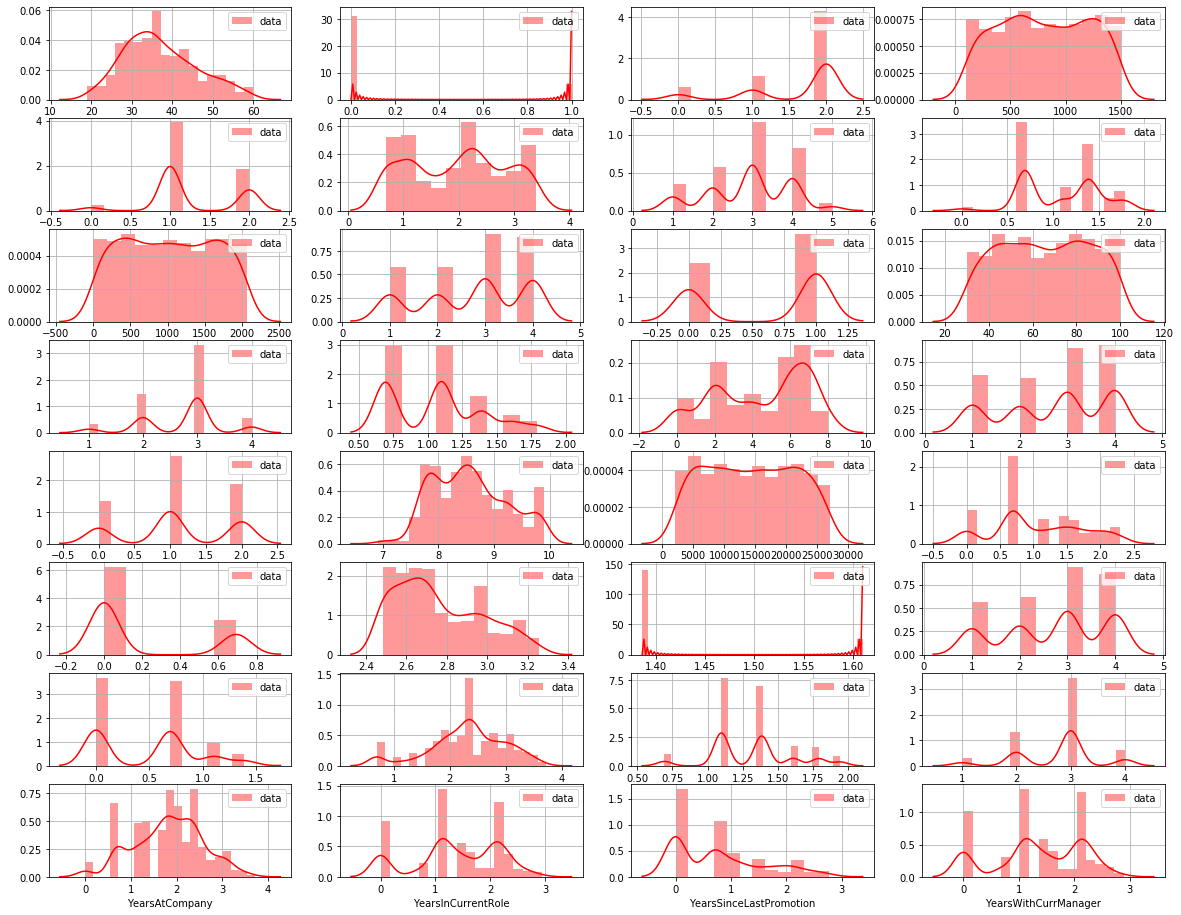

In [26]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(8,4,i+1)
    sns.distplot(df_new[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [27]:
# Checking the correlation
corr=df_new.corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1,-0.15,0.013,0.0058,-0.026,-0.028,0.21,-0.034,-0.016,0.011,-0.04,0.024,0.03,0.49,-0.11,0.0077,-0.073,0.48,0.025,0.32,0.024,-0.001,-0.0024,0.068,0.037,0.64,-0.013,-0.011,0.24,0.16,0.17,0.15
Attrition,-0.15,1,0.00057,-0.061,0.062,0.07,-0.03,0.011,-0.0026,-0.11,0.038,0.0028,-0.13,-0.18,0.064,-0.11,0.16,-0.19,0.0088,0.049,0.24,-0.019,-0.0027,-0.058,-0.16,-0.22,-0.027,-0.057,-0.19,-0.18,-0.049,-0.18
BusinessTravel,0.013,0.00057,1,-0.0099,-0.0051,-0.012,-0.012,0.022,-0.013,0.0084,-0.024,0.024,0.041,0.00074,0.0075,-0.029,0.027,0.019,-0.0094,0.019,0.016,-0.025,-0.023,-0.032,-0.013,0.018,0.019,-0.014,-0.026,-0.033,-0.038,-0.025
DailyRate,0.0058,-0.061,-0.0099,1,0.0009,-0.0015,-0.019,0.032,-0.055,0.025,-0.0056,0.032,0.051,5.6e-05,-0.009,0.03,-0.071,0.0078,-0.029,0.045,0.014,0.031,0.0082,0.007,0.042,0.015,-0.018,-0.038,-0.02,0.0028,-0.051,-0.0038
Department,-0.026,0.062,-0.0051,0.0009,1,0.034,0.016,0.082,0.0025,-0.028,-0.041,-0.0023,-0.022,0.15,0.67,0.027,0.044,0.13,0.015,-0.025,-0.002,-0.0023,-0.021,-0.029,-0.0079,-0.002,0.038,0.027,0.018,0.051,0.025,0.016
DistanceFromHome,-0.028,0.07,-0.012,-0.0015,0.034,1,0.019,0.02,0.033,-0.011,0.002,0.023,0.032,0.0098,0.0099,-0.0026,-0.021,-0.0087,0.042,-0.0085,0.031,0.024,0.0048,0.015,0.029,-0.007,-0.017,-0.021,0.0053,0.014,-0.0014,0.0026
Education,0.21,-0.03,-0.012,-0.019,0.016,0.019,1,-0.046,0.041,-0.03,-0.014,0.023,0.045,0.11,0.0087,-0.011,0.0019,0.12,-0.029,0.13,-0.018,-0.00024,-0.019,0.0018,0.022,0.17,-0.024,0.019,0.055,0.049,0.037,0.045
EducationField,-0.034,0.011,0.022,0.032,0.082,0.02,-0.046,1,-0.01,0.05,-0.0038,-0.015,-0.0013,-0.033,0.056,-0.031,0.021,-0.029,-0.02,-0.018,0.009,-0.0054,-0.0077,-0.0018,-0.014,-0.0062,0.055,0.048,0.0027,0.0055,0.011,0.019
EmployeeNumber,-0.016,-0.0026,-0.013,-0.055,0.0025,0.033,0.041,-0.01,1,0.027,0.029,0.038,-0.013,-0.017,0.0072,-0.044,0.0057,-0.013,0.018,-0.00015,-0.021,-0.013,-0.023,-0.07,0.055,-0.014,0.033,0.006,0.0057,-0.003,-0.00058,-0.0052
EnvironmentSatisfaction,0.011,-0.11,0.0084,0.025,-0.028,-0.011,-0.03,0.05,0.027,1,0.0021,-0.05,-0.0044,-0.0021,-0.029,-0.011,-0.0063,-0.017,0.037,0.0092,0.064,-0.023,-0.017,0.009,0.0077,-0.019,-0.003,0.031,0.014,0.026,0.029,0.0062


In [28]:
# Drooping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['Attrition'],axis=1)
x1
print(x1.shape)

(1406, 31)


In [29]:
# Setting up the Target value in variable y.
y=df_new['Attrition']
y.shape

(1406,)

In [30]:
# scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1.327694,-0.932406,-1.307322,-0.496940,0.252955,-1.865021,-0.963191,-1.700410,0.260558,0.818434,...,2.347181,1.200489,0.461372,0.123515,0.232992,0.334271,0.762522,0.875735,-0.124410,0.892678
1,-0.005531,0.586671,1.410978,-0.496940,-1.027709,-0.891304,1.235585,-1.697090,1.176419,0.818434,...,-0.426043,-0.653314,-1.065257,-0.353341,0.232992,0.334271,-2.451820,-1.764520,-0.981730,-1.698017
2,-0.449940,-0.932406,1.458188,-0.496940,-0.692355,1.056129,-0.963191,-1.695430,1.176419,-1.221846,...,-0.426043,0.273588,-1.065257,-0.176971,0.232992,0.334271,0.493526,0.875735,0.732911,-1.698017
3,-1.116552,0.586671,-0.532085,-0.496940,-1.027709,-1.865021,0.700119,-1.692111,-1.571164,0.818434,...,-0.426043,1.200489,0.461372,-0.553292,0.232992,0.334271,-0.979147,-0.369618,0.377091,-0.329299
4,-0.561042,-0.932406,0.496595,-0.496940,-1.027709,-0.891304,-0.963191,-1.690451,1.176419,0.818434,...,-0.426043,0.273588,-1.065257,-0.176971,-0.760975,-1.081348,0.335640,0.875735,0.732911,0.726316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401,-1.227654,0.586671,0.899122,1.396548,-0.219700,0.082413,1.235585,1.715502,1.176419,-1.221846,...,-0.426043,1.200489,-1.065257,-0.784118,-0.760975,0.334271,-0.294393,-0.369618,-0.981730,-1.698017
1402,-0.116633,-0.932406,0.195942,-0.496940,1.396318,-0.891304,0.700119,1.717161,0.260558,0.818434,...,-0.426043,0.273588,0.461372,0.860953,0.232992,0.334271,-0.049994,-0.369618,-0.981730,0.029113
1403,0.216673,0.586671,-0.477421,-0.496940,-0.040005,-1.865021,0.700119,1.718821,1.176419,0.818434,...,-0.426043,-1.580216,0.461372,-0.019204,1.633910,0.334271,0.335640,0.875735,-0.124410,0.892678
1404,1.327694,-0.932406,0.541321,1.396548,-1.027709,0.082413,0.700119,1.723801,1.176419,0.818434,...,-0.426043,1.200489,-1.065257,0.860953,0.232992,-1.081348,0.634760,0.706191,-0.981730,1.039419


# Model Training

In [31]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=10)
    clf.fit(x,y)
    print(clf.best_params_)

In [32]:
#.........Grid Search for DecisionTreeClassifier......
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,'accuracy')


{'criterion': 'entropy', 'max_depth': 5, 'random_state': 10}


In [33]:
#.......Grid Search for GradientBoostingClassifier......
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbc,parameters,'accuracy')


{'learning_rate': 0.1, 'n_estimators': 100}


In [34]:
#.......Grid Search for KNeighborsClassifier.......
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,'accuracy')

{'n_neighbors': 5}


In [35]:
#.........Grid Search for SVC........
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4],}
grid_cv(svc,parameters,'accuracy')

{'gamma': 0.001, 'random_state': 1}


In [36]:
#........Grid Search for LogisticRegression....
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_cv(lr,parameters,'accuracy')

{'C': 0.01}


In [37]:
#.......Grid Search for RandomForestClassifier.....
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500, 700,],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,'accuracy')

{'max_features': 'log2', 'n_estimators': 200}


In [38]:
#.....Grid Search for AdaBoostClassifier......
adc=AdaBoostClassifier()
parameters={'n_estimators': [200,500, 700,]}
grid_cv(adc,parameters,'accuracy')

{'n_estimators': 200}


In [39]:
#........Defining Instances For Differnt Models.......
KNN=KNeighborsClassifier(n_neighbors=5)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=0.01)
DT=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=10)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
RF=RandomForestClassifier(max_features= 'sqrt', n_estimators= 700,)
AD=AdaBoostClassifier(n_estimators=200,)

In [40]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))

In [50]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  86 is: 0.8723404255319149


Learning Score :  0.8772241992882562
Accuracy Score :  0.8723404255319149
Cross Val Score :  0.8549313740496964
roc auc score :  0.6001718869365928


Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       238
           1       0.90      0.20      0.33        44

    accuracy                           0.87       282
   macro avg       0.89      0.60      0.63       282
weighted avg       0.88      0.87      0.84       282



Confusion Matrix:
 [[237   1]
 [ 35   9]]





*************************** SVC *****************************


SVC(C=1.0, cache_size=200, class_weigh

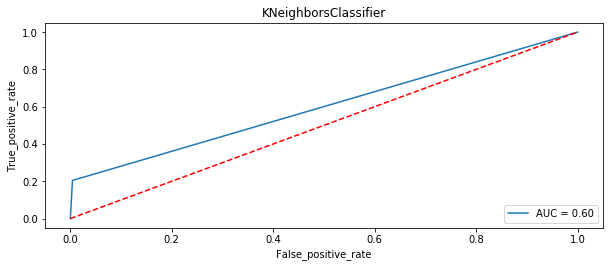

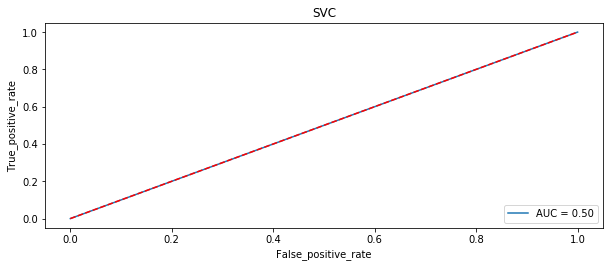

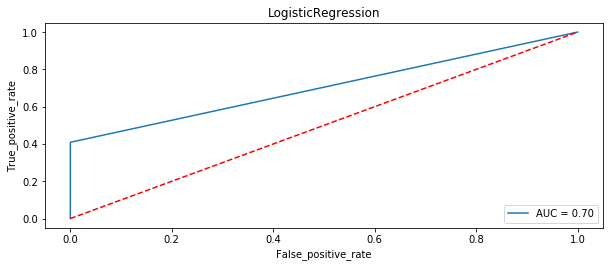

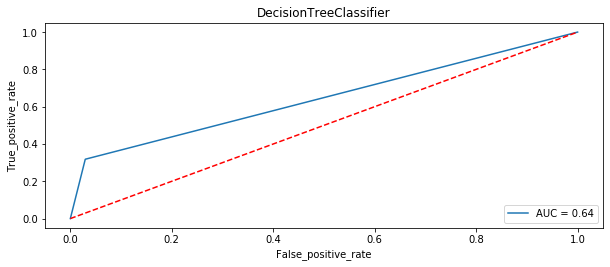

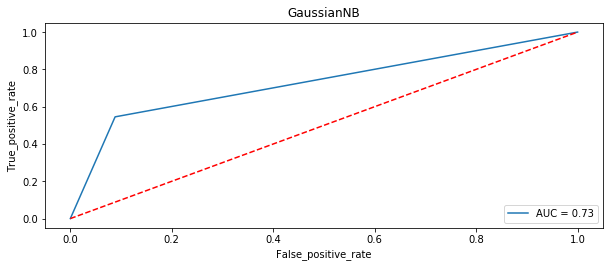

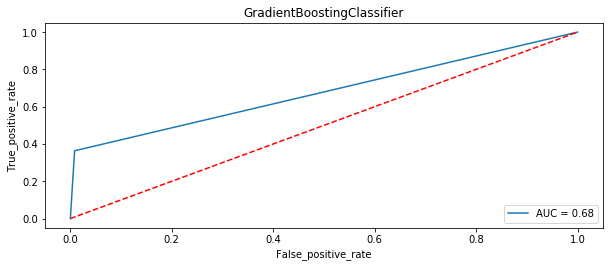

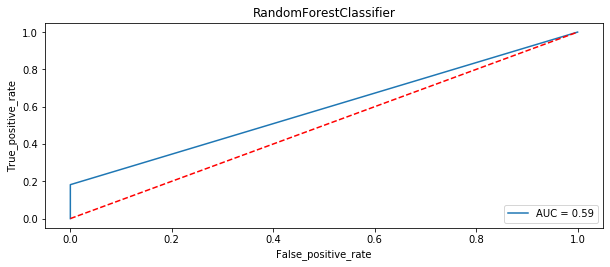

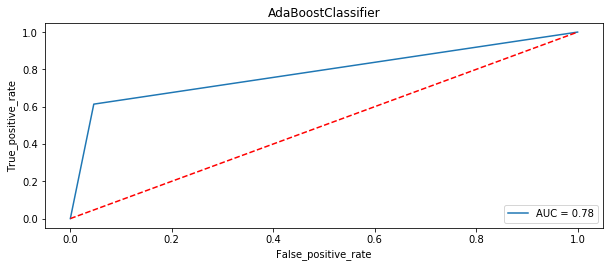

In [51]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')
    

In [52]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,'Roc_Auc_curve':rocscore})   #'Roc_Auc_curve':rocscore
result

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,87.722420,87.234043,85.493137,60.017189
1,SVC,84.519573,84.397163,84.496148,50.000000
2,LogisticRegression,87.900356,90.780142,88.483086,70.454545
3,DecisionTreeClassifier,88.967972,86.879433,85.283433,64.438503
4,GaussianNB,82.562278,85.460993,81.874075,72.860963
5,GradientBoostingClassifier,91.548043,89.361702,87.200367,67.761650
6,RandomForestClassifier,100.000000,87.234043,86.131435,59.090909
7,AdaBoostClassifier,93.683274,90.070922,86.346242,78.370894


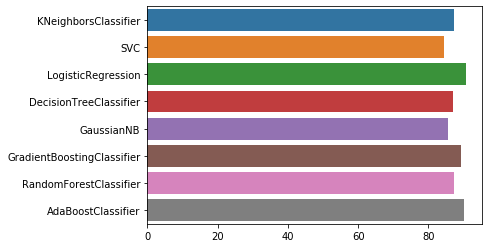

In [53]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

## After all this process conclusion is that LogisticRegression is performing well.


In [45]:
# Using LogisticRegression for final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90,test_size=.20,stratify=y)
lr=LogisticRegression(C=0.01)
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
lrpred=lr.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,lrpred))
print('Confusion Matrix:',confusion_matrix(y_test,lrpred))
print('Classification Report:',classification_report(y_test,lrpred))

Accuracy Score: 0.9078014184397163
Confusion Matrix: [[238   0]
 [ 26  18]]
Classification Report:               precision    recall  f1-score   support

           0       0.90      1.00      0.95       238
           1       1.00      0.41      0.58        44

    accuracy                           0.91       282
   macro avg       0.95      0.70      0.76       282
weighted avg       0.92      0.91      0.89       282



(2.0, 0.0)

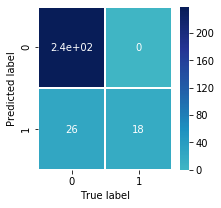

In [46]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, lrpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [47]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=lrpred
test
# On the lest side values are those which are taken by machine for test...

,Attrition,Predicted values
420,0,0
443,1,0
145,0,0
869,0,0
462,0,0
...,...,...
1233,0,0
660,1,0
1404,0,0
327,1,0


In [48]:
# Saving the Predicted values in csv file
test.to_csv('Project_9_HR_Analytics.csv') 

In [49]:
# Dumping Data in pickle file.
from sklearn.externals import joblib
joblib.dump(lr,'Project_9_HR_Analytics.csv.pkl')

['Project_9_HR_Analytics.csv.pkl']

### Conclusion:                

1) So the Employees whose ages are between 26 and 33 are more keen to left the company, looks like persons with less               experience switches jobs more frequently.                                         
2) Company have more employees whose age lie between 34 and 36.                              
3) Number of leavers are less as compared to loyal employees.                       
4) Number of Persons who left falls in the Travel_Rarely Category but, Proportion of attrition is higher where travel is           frequently.                                           
5) Number of persons who left are from R&D department but the proportion is high in Sales Department.                        
6) Number of Persons who left lives in the (0-10) km range are more.               
7) Number of Persons who left are from Life Sciences department.                         
8) People who likes the enviroment very much and who don't like the environment are almost equal.                              
9) Ex Employees are more who are male than Females.                  
10) Hourly Rate of Ex-Employees are less, This shows their inefficiency.                     
11) Number of Laboratory Technicians and also their proportion of Attrition is more than the rest.            
12) so we can analyse  the attrition ratio in each category of Job Satisfaction and take corrective actions by understanding       the reason behind the attrition.                   
13) Here we are able  to see that as job satisfaction increases proportion of leavers decreases.                
14) Persons who are single are more eager to switch jobs, Married persons take the risk of Leaving less.                       
15) Persons who works in less companies( preferably 1) are more. Looks like they think that switching jobs increase their           salary.                  
16) Proportion of Attrition is more in the group who does more overtime.                               
17) As Proportion of Salaryhike increases Proportion of Attrition also increases, looks like Switching is due to less salary       increment.                          
18) May be since Ex's expect that their work deserves more rating and is undervalued, almost all the people who left were who       got rating 3.               
19) Employees who do have 0 stockoption level have more Attrition rate.               
20) Employees who do have less Total working years have high Attrition rate.           
21) Employees who spent less time in the company have high Attrition rate.                 
22) Employees who have less Professional experience in their respective field has high Attrition rate.                                   

### Steps Followed:                         

1) Data Analysis.         
2) EDA Analysis.                
3) Best parameters are found using Gridsearch cv and applied to models.         
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.   
5) AUC ROC Curves are made for each model.          
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.       
7) LogisticRegression is used to train the model finally as it's accuracy score is best among the rest of the models.  
8) Predicted values are saved in Project_9_HR_Analytics.csv file.       
9) Pickle file is named with Project_9_HR_Analytics.csv.pkl        